In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("heart 2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<AxesSubplot:xlabel='Age', ylabel='count'>

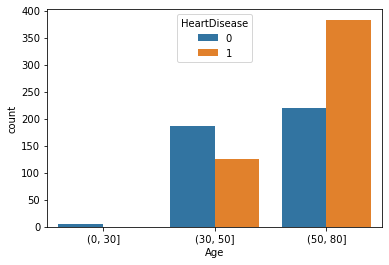

In [5]:
bins=[0,30,50,80]
sns.countplot(x=pd.cut(df.Age,bins=bins),hue=df.HeartDisease)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

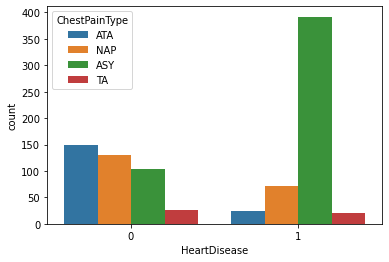

In [6]:
sns.countplot(x=df.HeartDisease,hue=df.ChestPainType)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

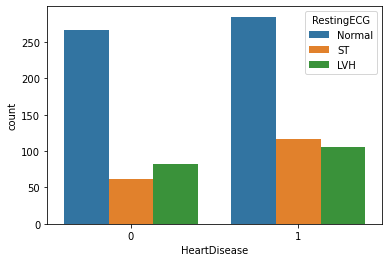

In [7]:
sns.countplot(x=df.HeartDisease,hue=df.RestingECG)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

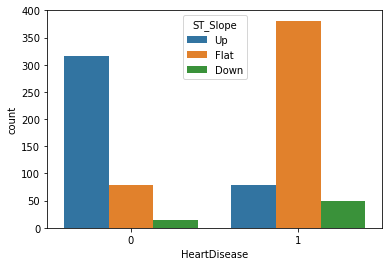

In [8]:
sns.countplot(x=df.HeartDisease,hue=df.ST_Slope)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

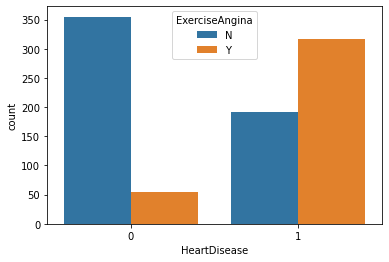

In [9]:
sns.countplot(x=df.HeartDisease,hue=df.ExerciseAngina)

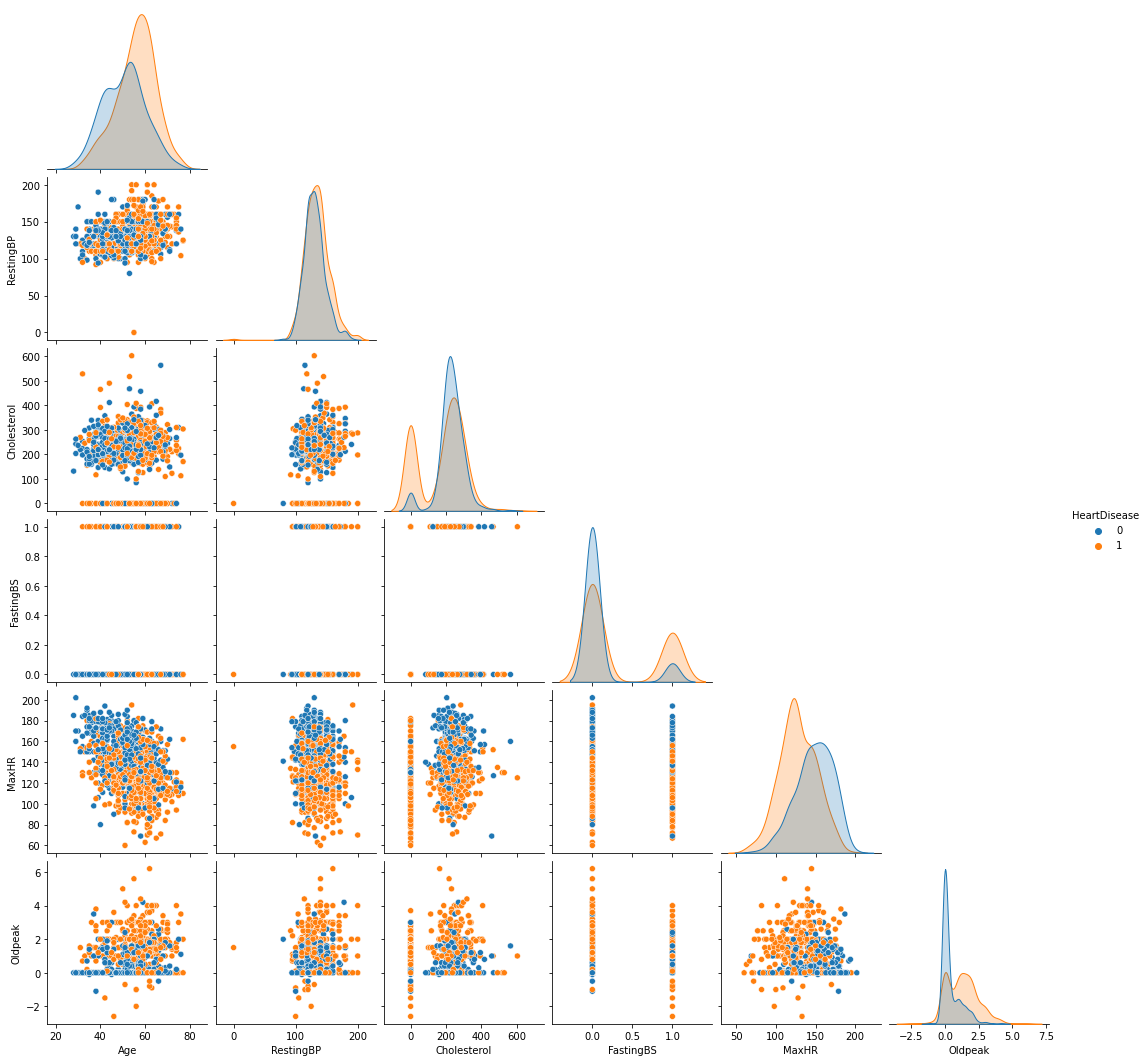

In [10]:
sns.pairplot(df,hue='HeartDisease',corner=True)

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
df_e=pd.get_dummies(df)

In [13]:
df_e

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [14]:
X=df_e.drop(['HeartDisease'],axis=1)
y=df_e['HeartDisease']

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [17]:
#the classification before any dimentionality reduction

neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Train set Accuracy :", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy :", metrics.accuracy_score(y_test, yhat))

#from here we can say that the best n values lies between 9 to 14 therefore
#let the optimal n value be 9 for this model 

Train set Accuracy : 0.8745454545454545
Test set Accuracy : 0.8586956521739131


In [18]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [19]:
precision_score(y_test, yhat)

0.9121951219512195

In [20]:
recall_score(y_test, yhat)

0.8461538461538461

In [21]:
f1_score(y_test, yhat)

0.8779342723004695

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       147
           1       0.91      0.85      0.88       221

    accuracy                           0.86       368
   macro avg       0.85      0.86      0.86       368
weighted avg       0.86      0.86      0.86       368

